## Регрессионная нейронная сеть

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Импортируем наш датасет

In [2]:
import pickle
input = open('data_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

y_train = np.asarray(y_train).reshape(-1,1)
y_test = np.asarray(y_test).reshape(-1,1)

Проводим шкалирование.

In [3]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(y_train)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Прописываем структуру нашей сети (стоит отметить, что структура, которая описана ниже была получена экспериментальным путём). Добавляем исходный слой. На входе 11 нейронов.У нас нейронная сеть с расширением. Выбранная функция-тангенс, так как нам подходит диапазон её изменения.Добавляем 2 слой.И добавляем последний слой.

In [5]:
rnn = Sequential()

rnn.add(Dense(12, activation = 'tanh', input_dim = 11))

rnn.add(Dense(8, activation = 'tanh'))

rnn.add(Dense(1, activation = 'linear'))

rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

Проводим обучение. 

In [6]:
his=rnn.fit(X_train, y_train, batch_size = 8, validation_data=(X_test, y_test),epochs = 100)

Epoch 1/100
7/7 [==============================] - 0s 20ms/step - loss: 0.9035 - accuracy: 0.0000e+00 - val_loss: 0.7697 - val_accuracy: 0.0000e+00
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.8304 - accuracy: 0.0000e+00 - val_loss: 0.7278 - val_accuracy: 0.0000e+00
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7748 - accuracy: 0.0000e+00 - val_loss: 0.6895 - val_accuracy: 0.0000e+00
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7264 - accuracy: 0.0000e+00 - val_loss: 0.6585 - val_accuracy: 0.0000e+00
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6862 - accuracy: 0.0000e+00 - val_loss: 0.6260 - val_accuracy: 0.0000e+00
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6517 - accuracy: 0.0000e+00 - val_loss: 0.5960 - val_accuracy: 0.0000e+00
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6295 - accuracy: 0.0000e+00 - val_loss: 0.56

7/7 [==============================] - 0s 3ms/step - loss: 0.2937 - accuracy: 0.0000e+00 - val_loss: 0.5035 - val_accuracy: 0.0000e+00
Epoch 57/100
7/7 [==============================] - 0s 3ms/step - loss: 0.2908 - accuracy: 0.0000e+00 - val_loss: 0.5032 - val_accuracy: 0.0000e+00
Epoch 58/100
7/7 [==============================] - 0s 3ms/step - loss: 0.2874 - accuracy: 0.0000e+00 - val_loss: 0.5039 - val_accuracy: 0.0000e+00
Epoch 59/100
7/7 [==============================] - 0s 3ms/step - loss: 0.2847 - accuracy: 0.0000e+00 - val_loss: 0.5115 - val_accuracy: 0.0000e+00
Epoch 60/100
7/7 [==============================] - 0s 3ms/step - loss: 0.2812 - accuracy: 0.0000e+00 - val_loss: 0.5136 - val_accuracy: 0.0000e+00
Epoch 61/100
7/7 [==============================] - 0s 3ms/step - loss: 0.2787 - accuracy: 0.0000e+00 - val_loss: 0.5148 - val_accuracy: 0.0000e+00
Epoch 62/100
7/7 [==============================] - 0s 3ms/step - loss: 0.2753 - accuracy: 0.0000e+00 - val_loss: 0.5155 - va

In [7]:
y_pred = rnn.predict(X_test)

Посмотрим на графики ошибок обучения и тестирования. Видим, что модель начинает всё сильнее переобучаться после 32 эпох, поэтому построим ещё одну сеть rnn1.

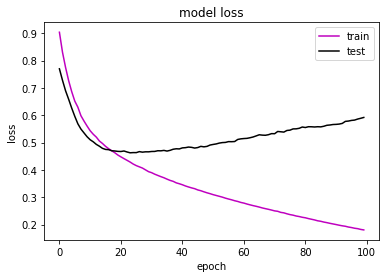

In [8]:
plt.figure()
plt.plot(his.history['loss'],'m')
plt.plot(his.history['val_loss'],'k')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [9]:
rnn1 = Sequential()

rnn1.add(Dense(12, activation = 'tanh', input_dim = 11))

rnn1.add(Dense(8, activation = 'tanh'))

rnn1.add(Dense(1, activation = 'linear'))

rnn1.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [10]:
his1=rnn1.fit(X_train, y_train, batch_size = 8, validation_data=(X_test, y_test),epochs = 27)

Epoch 1/27
7/7 [==============================] - 0s 17ms/step - loss: 1.0868 - accuracy: 0.0000e+00 - val_loss: 0.6867 - val_accuracy: 0.0000e+00
Epoch 2/27
7/7 [==============================] - 0s 4ms/step - loss: 1.0242 - accuracy: 0.0000e+00 - val_loss: 0.6718 - val_accuracy: 0.0000e+00
Epoch 3/27
7/7 [==============================] - 0s 4ms/step - loss: 0.9736 - accuracy: 0.0000e+00 - val_loss: 0.6572 - val_accuracy: 0.0000e+00
Epoch 4/27
7/7 [==============================] - 0s 4ms/step - loss: 0.9333 - accuracy: 0.0000e+00 - val_loss: 0.6448 - val_accuracy: 0.0000e+00
Epoch 5/27
7/7 [==============================] - 0s 4ms/step - loss: 0.8922 - accuracy: 0.0000e+00 - val_loss: 0.6340 - val_accuracy: 0.0000e+00
Epoch 6/27
7/7 [==============================] - 0s 4ms/step - loss: 0.8555 - accuracy: 0.0000e+00 - val_loss: 0.6228 - val_accuracy: 0.0000e+00
Epoch 7/27
7/7 [==============================] - 0s 4ms/step - loss: 0.8262 - accuracy: 0.0000e+00 - val_loss: 0.6144 - va

In [11]:
y_pred1 = rnn1.predict(X_test)

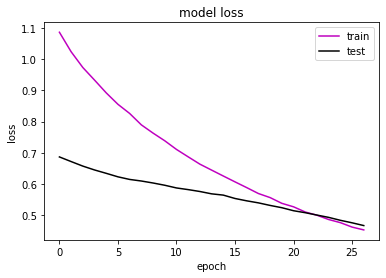

In [12]:
plt.figure()
plt.plot(his1.history['loss'],'m')
plt.plot(his1.history['val_loss'],'k')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Обратно шкалируем данные.

In [13]:
y_hat = sc_y.inverse_transform(y_pred)
y_hat1 = sc_y.inverse_transform(y_pred1)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

Находим среднеквадратические ошибки для двух моделей. Сеть немного переобучена, но во втором случае разрыв между ошибками гораздо меньше.

In [14]:
from sklearn.metrics import mean_squared_error
mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(rnn.predict(X_train)), squared=False).round(3), mean_squared_error(y_test, y_hat, squared=False).round(3)

(833.096, 1516.371)

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(rnn1.predict(X_train)), squared=False).round(3), mean_squared_error(y_test, y_hat1, squared=False).round(3)

(1311.247, 1345.988)

Визуализация результатов второй сети.

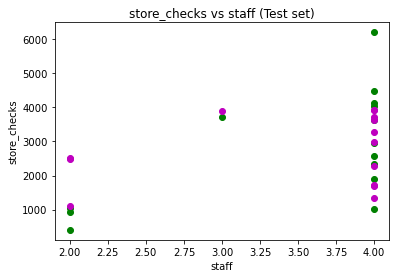

In [17]:
plt.scatter(X_test[:,2], y_test, color = 'green')
plt.plot(X_test[:,2], y_hat1, 'mo')
plt.title('store_checks vs staff (Test set)')
plt.xlabel('staff')
plt.ylabel('store_checks')
plt.show()

In [55]:
import pickle
input = open('data_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

y_train = np.asarray(y_train).reshape(-1,1)
y_test = np.asarray(y_test).reshape(-1,1)

Построим НС только на значимых переменных. Напомню, у нас их 3: staff,average_income_of_customers,coating_quality. Для этого меняем архитектуру сети и в перемнную f записываем только значимые. Я не буду повторно прописывать все комментарии, так как они анлогичны и дейтсвия тоже.

In [56]:
f = ['staff','average_income_of_customers','coating_quality']
X_train = X_train[f]
X_test = X_test[f]

In [57]:
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(y_train)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

In [58]:
rnn = Sequential()

rnn.add(Dense(4, activation = 'tanh', input_dim = 3))

rnn.add(Dense(2, activation = 'tanh'))

rnn.add(Dense(1, activation = 'linear'))

rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [59]:
his=rnn.fit(X_train, y_train, batch_size = 8, validation_data=(X_test, y_test),epochs = 100)

Epoch 1/100
7/7 [==============================] - 0s 15ms/step - loss: 1.0867 - accuracy: 0.0000e+00 - val_loss: 0.8334 - val_accuracy: 0.0000e+00
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 1.0610 - accuracy: 0.0000e+00 - val_loss: 0.8218 - val_accuracy: 0.0000e+00
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 1.0362 - accuracy: 0.0000e+00 - val_loss: 0.8097 - val_accuracy: 0.0000e+00
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 1.0110 - accuracy: 0.0000e+00 - val_loss: 0.7989 - val_accuracy: 0.0000e+00
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.9887 - accuracy: 0.0000e+00 - val_loss: 0.7880 - val_accuracy: 0.0000e+00
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.9629 - accuracy: 0.0000e+00 - val_loss: 0.7775 - val_accuracy: 0.0000e+00
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.9435 - accuracy: 0.0000e+00 - val_loss: 0.76

7/7 [==============================] - 0s 4ms/step - loss: 0.4236 - accuracy: 0.0000e+00 - val_loss: 0.4608 - val_accuracy: 0.0000e+00
Epoch 57/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4212 - accuracy: 0.0000e+00 - val_loss: 0.4588 - val_accuracy: 0.0000e+00
Epoch 58/100
7/7 [==============================] - 0s 4ms/step - loss: 0.4169 - accuracy: 0.0000e+00 - val_loss: 0.4557 - val_accuracy: 0.0000e+00
Epoch 59/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4133 - accuracy: 0.0000e+00 - val_loss: 0.4533 - val_accuracy: 0.0000e+00
Epoch 60/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4100 - accuracy: 0.0000e+00 - val_loss: 0.4514 - val_accuracy: 0.0000e+00
Epoch 61/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4063 - accuracy: 0.0000e+00 - val_loss: 0.4499 - val_accuracy: 0.0000e+00
Epoch 62/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4034 - accuracy: 0.0000e+00 - val_loss: 0.4484 - va

In [60]:
y_pred = rnn.predict(X_test)

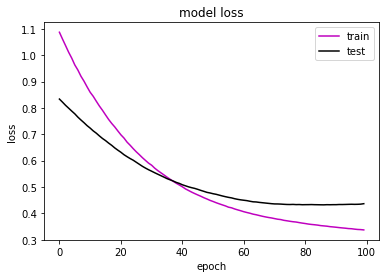

In [61]:
plt.figure()
plt.plot(his.history['loss'],'m')
plt.plot(his.history['val_loss'],'k')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [62]:
rnn1 = Sequential()

rnn1.add(Dense(4, activation = 'tanh', input_dim = 3))

rnn1.add(Dense(2, activation = 'tanh'))

rnn1.add(Dense(1, activation = 'linear'))

rnn1.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [63]:
his1=rnn1.fit(X_train, y_train, batch_size = 8, validation_data=(X_test, y_test),epochs = 35)

Epoch 1/35
7/7 [==============================] - 0s 14ms/step - loss: 0.8761 - accuracy: 0.0000e+00 - val_loss: 0.6353 - val_accuracy: 0.0000e+00
Epoch 2/35
7/7 [==============================] - 0s 5ms/step - loss: 0.8546 - accuracy: 0.0000e+00 - val_loss: 0.6280 - val_accuracy: 0.0000e+00
Epoch 3/35
7/7 [==============================] - 0s 4ms/step - loss: 0.8351 - accuracy: 0.0000e+00 - val_loss: 0.6212 - val_accuracy: 0.0000e+00
Epoch 4/35
7/7 [==============================] - 0s 4ms/step - loss: 0.8185 - accuracy: 0.0000e+00 - val_loss: 0.6148 - val_accuracy: 0.0000e+00
Epoch 5/35
7/7 [==============================] - 0s 4ms/step - loss: 0.8000 - accuracy: 0.0000e+00 - val_loss: 0.6088 - val_accuracy: 0.0000e+00
Epoch 6/35
7/7 [==============================] - 0s 4ms/step - loss: 0.7850 - accuracy: 0.0000e+00 - val_loss: 0.6024 - val_accuracy: 0.0000e+00
Epoch 7/35
7/7 [==============================] - 0s 4ms/step - loss: 0.7656 - accuracy: 0.0000e+00 - val_loss: 0.5972 - va

In [64]:
y_pred1 = rnn1.predict(X_test)

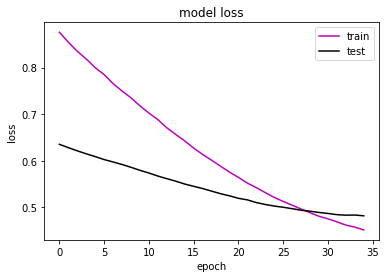

In [65]:
plt.figure()
plt.plot(his1.history['loss'],'m')
plt.plot(his1.history['val_loss'],'k')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [66]:
y_hat = sc_y.inverse_transform(y_pred)
y_hat1 = sc_y.inverse_transform(y_pred1)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [67]:
from sklearn.metrics import mean_squared_error
mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(rnn.predict(X_train)), squared=False).round(3), mean_squared_error(y_test, y_hat, squared=False).round(3)

(1142.757, 1302.669)

In [68]:
from sklearn.metrics import mean_squared_error
mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(rnn1.predict(X_train)), squared=False).round(3), mean_squared_error(y_test, y_hat1, squared=False).round(3)

(1319.076, 1367.717)

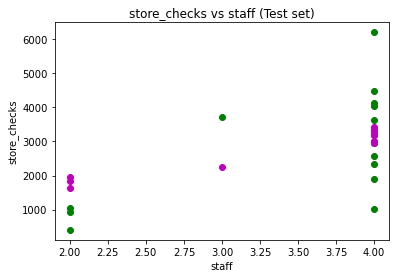

In [69]:
plt.scatter(X_test[:,0], y_test, color = 'green')
plt.plot(X_test[:,0], y_hat1, 'mo')
plt.title('store_checks vs staff (Test set)')
plt.xlabel('staff')
plt.ylabel('store_checks')
plt.show()

## ВЫВОД: первоначально мы выбрали, что хотим определить влияние известных параметров на количество чеков в магазинах. Обработав данные, мы приступили к построению линеной регрессии. Выяснили, что простая линейная регрессия слишком примитивная для нашего исследования, так как она немного переобучена, недостаточно хорошо объясняет наши данные (57%) и вряд ли на количество чеков влияет только количество сотрудников в магазине. Неидеальность этой модели подтвердила и визуализация. Полиномиальная модель слишком переобучилась, хотя и показала почти 100%-ый коэффициент детерминации, поэтому мы тоже не можем её использовать. Сразу перескочу к нейронным сетям. Это интересное исследование. Я провела огромное количество экспериментов и выявила, что да, можно использовать НС для нашей работы, но ошибки там достаточно велики, а также мне показалось, что это сложноватый метод для нашего датасета. Пришлось значительно снизить количество эпох. При построении НС только на значимых факторах сиуация не улучшилась, по сути получили такие же результаты. Самая лучшая модель получилась с использованием многофакторной линейной регрессии, где коээфициент детерминации 60%, модель не переобучена. То есть исходя из результатов, делаем вывод, что на количество чеков в магазине наиболее влияют количество сотрудников, средний доход покупателей и качество покрытия дороги у магазина!